In [7]:
# authors : Guillaume Lemaitre <g.lemaitre58@gmail.com>
# license : MIT

from os.path import dirname, join
from pprint import pprint

import pydicom
from pydicom.data.data_manager import get_files
from pydicom.filereader import read_dicomdir

# fetch the path to the test data
#filepath = get_testdata_file('DICOMDIR')
files_arr = get_files(r'C:\Users\nonam\Jupyter\DICOM\RLADD01000009306_RLSDD01000009279\CT\Chest-HCT',
                     r'CT_1.2.276.0.7230010.3.1.4.1417964692')
# print('Path to the DICOM directory: {}'.format(filepath))
# # load the data
for item in files_arr:
    dicom_dir = read_dicomdir(item)
    base_dir = dirname(item)


    # print(dicom_dir)
    # print(dicom_dir.patient_records)

    # go through the patient record and print information
    for patient_record in files_arr:
        if (hasattr(patient_record, 'PatientID') and
                hasattr(patient_record, 'PatientName')):
            print("Patient: {}: {}".format(patient_record.PatientID,
                                           patient_record.PatientName))
        studies = patient_record.children
        # got through each serie
        for study in studies:
            print(" " * 4 + "Study {}: {}: {}".format(study.StudyID,
                                                      study.StudyDate,
                                                      study.StudyDescription))
            all_series = study.children
            # go through each serie
            for series in all_series:
                image_count = len(series.children)
                plural = ('', 's')[image_count > 1]

                # Write basic series info and image count

                # Put N/A in if no Series Description
                if 'SeriesDescription' not in series:
                    series.SeriesDescription = "N/A"
                print(" " * 8 + "Series {}: {}: {} ({} image{})".format(
                    series.SeriesNumber, series.Modality, series.SeriesDescription,
                    image_count, plural))

                # Open and read something from each image, for demonstration
                # purposes. For simple quick overview of DICOMDIR, leave the
                # following out
                print(" " * 12 + "Reading images...")
                image_records = series.children
                image_filenames = [join(base_dir, *image_rec.ReferencedFileID)
                                   for image_rec in image_records]

                datasets = [pydicom.dcmread(image_filename)
                            for image_filename in image_filenames]

                patient_names = set(ds.PatientName for ds in datasets)
                patient_IDs = set(ds.PatientID for ds in datasets)

                # List the image filenames
                print("\n" + " " * 12 + "Image filenames:")
                print(" " * 12, end=' ')
                pprint(image_filenames, indent=12)

                # Expect all images to have same patient name, id
                # Show the set of all names, IDs found (should each have one)
                print(" " * 12 + "Patient Names in images..: {}".format(
                    patient_names))
                print(" " * 12 + "Patient IDs in images..: {}".format(
                    patient_IDs))

InvalidDicomError: File 'C:\Users\nonam\Jupyter\DICOM\RLADD01000009306_RLSDD01000009279\CT\Chest-HCT\CT_1.2.276.0.7230010.3.1.4.1417964692.10880.1568735355.16972' is not a Media Storage Directory file

In [13]:
ds = pydicom.dcmread("C:\\Users\\nonam\\Jupyter\\DICOM\\RLADD01000009306_RLSDD01000009279\\CT\\Chest-HCT\\CT_1.2.276.0.7230010.3.1.4.1417964692.10880.1568735356.17365")


In [19]:
ds

(0008, 0005) Specific Character Set              CS: 'ISO_IR 192'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0013) Instance Creation Time              TM: ''
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.1417964692.10880.1568735356.17365
(0008, 0030) Study Time                          TM: '1'
(0008, 0031) Series Time                         TM: '1'
(0008, 0032) Acquisition Time                    TM: '1'
(0008, 0033) Content Time                        TM: '1'
(0008, 0050) Accession Number                    SH: 'RLADD01000009306'
(0008, 0052) Query/Retrieve Level                CS: 'STUDY'
(0008, 0054) Retrieve AE Title                   AE: 'DC51'
(0008, 0055) Station  AE Title                   AE: '5A5A'
(0008, 0056) Instance Availability               CS: 'ONLINE'
(0008, 0060) Modality                            CS: 'CT'
(0008, 006

In [17]:
pydicom.read_file("C:\\Users\\nonam\\Jupyter\\DICOM\\RLADD01000009306_RLSDD01000009279\\CT\\Chest-HCT\\CT_1.2.276.0.7230010.3.1.4.1417964692.10880.1568735356.17365")

(0008, 0005) Specific Character Set              CS: 'ISO_IR 192'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0013) Instance Creation Time              TM: ''
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.1417964692.10880.1568735356.17365
(0008, 0030) Study Time                          TM: '1'
(0008, 0031) Series Time                         TM: '1'
(0008, 0032) Acquisition Time                    TM: '1'
(0008, 0033) Content Time                        TM: '1'
(0008, 0050) Accession Number                    SH: 'RLADD01000009306'
(0008, 0052) Query/Retrieve Level                CS: 'STUDY'
(0008, 0054) Retrieve AE Title                   AE: 'DC51'
(0008, 0055) Station  AE Title                   AE: '5A5A'
(0008, 0056) Instance Availability               CS: 'ONLINE'
(0008, 0060) Modality                            CS: 'CT'
(0008, 006

In [59]:
ds.SliceLocation
# Поиск нужного слайда по z
def z_finder():
    for item in files_arr:
        #print(item)
        rf = pydicom.read_file(item)
        if rf.ImagePositionPatient[2] == 1737.3:
            plt.imshow(rf.pixel_array, cmap='gray', interpolation='none') 
        #print(rf.ImagePositionPatient)
        #print(f'Location: {rf.SliceLocation}, Instance Number: {rf.InstanceNumber}')
        #plt.imshow(rf.pixel_array, cmap='gray') 

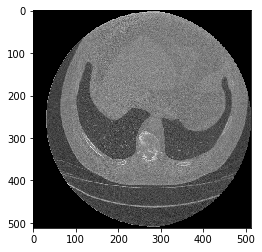

In [60]:
z_finder()

In [52]:
ds.ImagePositionPatient[2]

"1725.3"

In [32]:
files_arr[1]

'C:\\Users\\nonam\\Jupyter\\DICOM\\RLADD01000009306_RLSDD01000009279\\CT\\Chest-HCT\\CT_1.2.276.0.7230010.3.1.4.1417964692.10880.1568735355.16973'

In [10]:
ds.PixelData

b'\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\xf8\x00\x

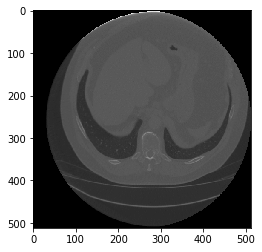

In [23]:
import matplotlib.pyplot as plt
plt.imshow(ds.pixel_array, cmap='gray') 

In [26]:
dspa = ds.pixel_array
dspa.shape

(512, 512)

In [15]:
ds.ImageOrientationPatient

[1, 0, 0, 0, 1, 0]

In [50]:
len(files_arr)
len(set(files_arr))

1743

In [17]:
get_testdata_file(r'RLADD01000009306_RLSDD01000009279\CT\Chest-HCT')

In [ ]:
DATA_ROOT = abspath(dirname(__file__))
data_path = join(DATA_ROOT, 'RLADD01000009306_RLSDD01000009279\CT\Chest-HCT')
for root, _, filenames in os.walk(data_path):
    for filename in filenames:
        if filename == name:
            return os.path.join(root, filename)

In [ ]:
# https://stackoverflow.com/questions/53837060/extract-sagittal-and-coronal-cuts-from-axial-view-using-pydicom
import os
import numpy as np
import pydicom as dicom
from matplotlib import pyplot as plt

#root_dir = r'C:\Users\nonam\Jupyter\DICOM\RLADD01000009306_RLSDD01000009279\CT\Chest-HCT'


def sortDcm():
        # print('Given Path to the .dcm directory is: {}'.format(root_dir))
        # slices = [dicom.read_file(root_dir + '/' + s) for s in os.listdir(root_dir)]
        slices = [pydicom.read_file(s) for s in files_arr]
        slices.sort(key = lambda x: float(x.ImagePositionPatient[2]))
        pos1 = slices[int(len(slices)/2)].ImagePositionPatient[2]
        pos2 = slices[(int(len(slices)/2)) + 1].ImagePositionPatient[2]
        diff = pos2 - pos1
#        if diff > 0:
#            slices = np.flipud(slices)
        try:
            slice_thickness = np.abs(slices[0].ImagePositionPatient[2] - slices[1].ImagePositionPatient[2])
        except:
            slice_thickness = np.abs(slices[0].SliceLocation - slices[1].SliceLocation)

        for s in slices:
            s.SliceThickness = slice_thickness
#        print("from sorted dicom",len(slices))         
        return slices 


dcms = sortDcm()
ref_dicom = dcms[0]

d_array = np.zeros((ref_dicom.Columns,ref_dicom.Rows, len(dcms)), dtype=ref_dicom.pixel_array.dtype)

for dcm in dcms:
    d_array[:, :, dcms.index(dcm)] = dcm.pixel_array

#    fig = plt.figure(figsize=(12,12))
#    plt.subplot(1, 3, 1)
#    plt.title("Coronal")
#    plt.imshow(np.flipud(d_array[idx , :, :].T))
#    plt.subplot(1, 3, 2)
#    plt.title("Sagital")
#    plt.imshow(np.flipud(d_array[:, idy, :].T))
#    plt.subplot(1, 3, 3)
    plt.title("axial")
    plt.imshow(d_array[:, :, dcms.index(dcm)])
    plt.pause(0.001)

In [ ]:

# fill 3D array with the images from the files
for i, s in enumerate(slices):
    img2d = s.pixel_array
    img3d[:,:,i] = img2d
#then to view sagittal and coronal slices for each of the axial slice
for i, s in enumerate(slices):
    img2d = s.pixel_array
    img3d[:,:,i] = img2d
    corId = corId-1
    sagId = sagId-1
#    plot 3 orthogonal slices
    a1 = plt.subplot(1,3,1)
    plt.title('Axial')
    plt.imshow(img3d[:,:,i],'gray')
    a1.set_aspect(ax_aspect)

    a2 = plt.subplot(1,3,2)
    plt.title('Sagittal')
    plt.imshow(np.flipud(img3d[:,sagId,:].T),'gray')
    a2.set_aspect(sag_aspect)

    a3 = plt.subplot(1,3,3)
    plt.imshow(np.flipud(img3d[corId,:,:].T),'gray')
    a3.set_aspect(cor_aspect)
    plt.title('Coronal')
    plt.show()
    plt.pause(0.001)  

In [ ]:
"""usage: reslice.py <glob>
where <glob> refers to a set of DICOM image files.

Example: python reslice.py "*.dcm". The quotes are needed to protect the glob
from your system and leave it for the script."""

import pydicom
import numpy as np
import matplotlib.pyplot as plt
import sys
import glob

# load the DICOM files
files=[]
print('glob: {}'.format(sys.argv[1]))
for fname in glob.glob(sys.argv[1], recursive=False):
    print("loading: {}".format(fname))
    files.append(pydicom.read_file(fname))

print("file count: {}".format(len(files)))

# skip files with no SliceLocation (eg scout views)
slices=[]
skipcount=0
for f in files:
    if hasattr(f, 'SliceLocation'):
        slices.append(f)
    else:
        skipcount = skipcount + 1

print("skipped, no SliceLocation: {}".format(skipcount))

# ensure they are in the correct order
slices = sorted(slices, key=lambda s: s.SliceLocation)

# pixel aspects, assuming all slices are the same
ps = slices[0].PixelSpacing
ss = slices[0].SliceThickness
ax_aspect = ps[1]/ps[0]
sag_aspect = ps[1]/ss
cor_aspect = ss/ps[0]

# create 3D array
img_shape = list(slices[0].pixel_array.shape)
img_shape.append(len(slices))
img3d=np.zeros(img_shape)

# fill 3D array with the images from the files
for i, s in enumerate(slices):
    img2d = s.pixel_array
    img3d[:,:,i] = img2d

# plot 3 orthogonal slices
a1 = plt.subplot(2,2,1)
plt.imshow(img3d[:,:,img_shape[2]//2])
a1.set_aspect(ax_aspect)

a2 = plt.subplot(2,2,2)
plt.imshow(img3d[:,img_shape[1]//2,:])
a2.set_aspect(sag_aspect)

a3 = plt.subplot(2,2,3)
plt.imshow(img3d[img_shape[0]//2,:,:].T)
a3.set_aspect(cor_aspect)

plt.show()